---
# **データサイエンス基礎　第4回課題**
## **【2項分布】任意の勝率で勝負した場合の確率**
## **【 $t$ 検定】血圧の降圧剤の有効性を調べる**
---
### 問1 【2項分布】任意の勝率で勝負した場合の確率
　勝率8割の将棋棋士が，5戦中3勝以上する確率を求めよ．ただし引き分けは無視することとする．  
  
　求める確率 $p$ は2項分布に従うため，3回以上勝利する確率は次式のように書ける．  
$$p = \sum_{k=3}^{n} \binom{n}{k} p_{win}^k (1 - p_{win})^{n - k}$$  
試合数が $n=5$ ，勝率が $p_{win}=\frac{4}{5}$ とすれば，
$$p = \sum_{k=3}^{5} \binom{5}{k} \left(\frac{4}{5}\right)^k \left(1 - \frac{4}{5}\right)^{5 - k}$$  
$$\Leftrightarrow p = \frac{1}{5^5} \sum_{k=3}^{5} \binom{5}{k} \cdot 4^k$$ 
展開して計算すると 
$$p = \frac{1}{5^5} \left(\binom{5}{3} \cdot 4^3 + \binom{5}{4} \cdot 4^4 + \binom{5}{5} \cdot 4^5\right)$$  
$$\Leftrightarrow p = \frac{4^3}{5^5} \cdot 46$$  
$$\Leftrightarrow p = \frac{2944}{3125} = 0.94208$$ 
$$\therefore p \approx 94.2 \% $$  
#### (1) SymPy 数学的計算プログラム  
　解の分数の値が大きく，解が確かであるか不安であるため，別の手法によって検算することを考える．  
調べると，Pythonの科学技術計算用のライブラリである”SymPy”というものがあると分かった．ChatGPTによれば，SymPyの目的や機能に関して以下のように説明されていた．
- Pythonで記号計算 (Symbolic Computation) を行うためのライブラリ  
- 記号計算は，数学的な式や関数を記号として扱い，代数的な操作（因数分解，微分，積分など）を行うことが可能  
- シンボリックな表現を用いて，数学的な問題を解析的に解決することができる．例えば，方程式の解を求めたり，微分方程式を解いたりすることが可能  
  
　したがって，以上の計算における変数や数式をSymPyに解かせることによって，以下のように解が等しくなることを確認する．

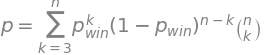

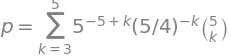

In [1]:
# 基本ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install sympy
# %pip install scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sympy as sp
import scipy.stats as stats

# 変数の定義
n, k, p, p_win, percent = sp.symbols('n k p p_win percent')

min = 3     # 最低勝利回数
max = 5     # 最高勝利回数（試合数）
odds = sp.Rational(4, 5)  # 勝率

# 2項分布に従う確率の定義式
equation = sp.Eq(p, sp.Sum(sp.binomial(n, k) * p_win ** k * (1 - p_win) ** (n - k), (k, min, n)))
sp.init_printing(order='rev-lex')
display(equation)

# 実数値を代入する
equation = equation.subs({n: max, p_win: odds})
display(equation)

# 展開して計算する
equation = equation.doit()
display(equation)

# 小数に直して[%]単位の解答を表示
equation_rhs = round(equation.rhs.evalf() * 100, 1)
equation = sp.Eq(p, equation_rhs)
display(equation)

したがって，$p=94.2$ $\%$ と求まり，数学的に計算した結果とSymPyによる計算結果が等しいことが確認できた．


#### (2) SciPy 2項分布の累積分布関数による計算プログラム  
　求める確率 $p$ が2項分布に従うということは，2項分布に従う確率変数が3以上となる確率と言い換えることができる．したがって，2項分布の累積分布関数を用いても解が求まるはずである．Pythonの科学技術計算用のライブラリとして，SymPyの他”SciPy”というものがあった．ChatGPTによれば，SciPyの目的や機能，SymPyとの違いに関して以下のようにまとめられていた．
- 数値計算や科学技術計算における多くの一般的な問題を解決するための高レベルの関数やアルゴリズムを包括
- 数値計算だけでなく．最適化，統計分析，信号処理，画像処理など，多くのサブモジュール機能を提供可能
- SciPyは，NumPyの上に構築されており，NumPyの多次元配列操作機能を拡張し，高度な数値計算機能を提供可能  

> SymPyとSciPyの違いは，SymPyは記号計算用のライブラリであり，数学的な問題を解析的に解決するために使用される一方で，SciPyは数値計算用のライブラリであり，科学技術計算やデータ解析などの多くの問題を数値的に解決するために使用される．  
  
　今回は，SciPyのbinom.cdf(k, n, p)関数を利用して，解を求める．ここで，binom.cdf(k, n, p)関数とは，二項分布の累積分布関数 (Cumulative Distribution Function) を計算するための関数で，引数については，以下の通りである．
- $k$： 累積分布関数を計算したい値（確率変数がこの値以下になる確率が計算される）
- $n$： 試行回数またはサンプルサイズ（今回は試合数）
- $p$： 各試行で成功する確率（今回は勝率）
> 例えば，binom.cdf(k, n, p) は，二項分布に従う確率変数が $k$ <u>**以下**</u>となる確率を返す．  

しかし，今回求める確率 $p$ は，二項分布に従う確率変数が 3 <u>**以上**</u>となる確率であるため，1 - binom.cdf(2, 5, 0.8)を考える必要があることに注意が必要である．

In [2]:
from scipy.stats import binom

number_of_win = 3       # 最低勝利回数
number_of_attempt = 5   # 最高勝利回数（試合数）
odds_of_winning = 0.8   # 勝率

# 二項分布の累積分布関数を使用して確率を計算
probability = 1 - binom.cdf(number_of_win - 1, number_of_attempt, odds_of_winning)

print('p = {:.1f} %'.format(probability * 100))

p = 94.2 %


したがって，$p=94.2$ $\%$ と求まり，数学的に計算した結果やSymPyによる計算結果とSciPyの2項分布の累積分布関数を用いて計算した結果が等しいことが確認できた．

### 問2 【 $t$ 検定】血圧の降圧剤の有効性を調べる
　12人に対して高血圧の治療として降圧剤を投与したところ，投与前後の血圧測定値の差は{ 2, -5, -4, -8, 3, 0, 3, -6, -2, 1, 0, -4 }であった．この治療法は有効であったか，有意水準 1 %で検定せよ．

#### (1) 検定手法を決定する手順  
##### 1.　目的を確認して，データを整理  
　今回は，「血圧測定値の差」という2つのグループに差があるか知りたいので，以下の図より，差の検定，分散分析，多重比較のいずれかが適切であると考えられる．  
![データ整理のフローチャート.mmd](データ整理.png)

##### 2.　データ尺度を確認  
　今回は，独立変数が「測定対象者」であり，名義尺度である．また，その従属変数は「降圧剤投与前後の血圧測定値の差」であり，比率尺度である．以下の表より，$t$ 検定か分散分析が適切であると考えられる．

<table>
  <thead>
    <tr>
      <th style="background-color: #101010; color: b7b7b7;">データの分類</th>
      <th style="background-color: #101010; color: b7b7b7;">尺度</th>
      <th style="background-color: #101010; color: b7b7b7;">説明</th>
      <th style="background-color: #101010; color: b7b7b7;">例</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="2">質的データ</td> <!-- 質的データの行の結合 -->
      <td>名義尺度</td>
      <td>分類を目的とした尺度 <br> 順序に意味のないもの</td>
      <td>出席番号，座席番号</td>
    </tr>
    <tr>
      <td>順序尺度</td>
      <td>順序にも意味がある尺度 <br> 間隔は定かではない</td>
      <td>学年，順位</td>
    </tr>
    <tr>
      <td rowspan="2">量的データ</td> <!-- 量的データの行の結合 -->
      <td>間隔尺度</td>
      <td>順序があり，かつ間隔にも意味があるもの</td>
      <td>気温，西暦，テストの点数</td>
    </tr>
    <tr>
      <td>比率尺度（比例尺度）</td>
      <td>0 が原点であり，間隔と比率に意味があるもの</td>
      <td>身長，速度，睡眠時間，値段</td>
    </tr>
  </tbody>
</table>
  　
<table>
  <thead>
    <tr>
      <th colspan="2", rowspan="2", style="text-align: center; background-color: #101010; color: b7b7b7;">変数</th>
      <th colspan="3", style="text-align: center; background-color: #101010; color: b7b7b7;">独立変数</th>
    </tr>
    <tr>
      <th style="text-align: center; background-color: #101010; color: b7b7b7;">名義尺度</th>
      <th style="text-align: center; background-color: #101010; color: b7b7b7;">順序尺度</th>
      <th style="text-align: center; background-color: #101010; color: b7b7b7;">間隔尺度・比率尺度</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="3", style="text-align: center; background-color: #101010; color: b7b7b7;"><b>従属変数</b></td> 
      <td style="text-align: center; background-color: #101010; color: b7b7b7;"><b>名義尺度</b></td>
      <td>分類表の検定 <br> （ <i>χ</i>²検定）</td>
      <td>単調回帰</td>
      <td>判断分析 <br> 多重ロジスティック回帰分析 </td>
    </tr>
    <tr>
      <td style="text-align: center; background-color: #101010; color: b7b7b7;"><b>順序尺度</b></td>
      <td>ノンパラメトリック検定 <br> 順序回帰</td>
      <td>順位相関 <br> 順序回帰 </td>
      <td>順序回帰</td>
    </tr>
    <tr>
      <td style="text-align: center; background-color: #101010; color: b7b7b7;"><b>間隔尺度・比率尺度</b></td> 
      <td><i>t</i> 検定 <br> 分散分析 </td>
      <td></td>
      <td>相関 <br> 回帰分析</td>
    </tr>
  </tbody>
</table>
  



##### 3.　正規分布の有無を確認して，手法を選択  
　今回は，「降圧剤投与前後の血圧測定値の差」という2つの群間に差があるか分析することになる．したがって，以下のフローチャートより，1標本 → 比率尺度 → $p\geq0.05$ をたどれば，「対応のある $t$ 検定」を行えば良いことが分かる．また，問よりこの降圧剤は新薬の可能性が高いと読み取れ，必ずしも血圧を低下させるものであるか不明であるため，両側検定を行うことが適切であると考えられる．
##### 3-1 ：2変数の関係を分析する場合  
![2変数の関係を分析する場合のフローチャート.mmd](2変数の分析.png)

##### 3-2 ：2以上の群間に差があるか分析する場合 
![2以上の群間に差があるか分析する場合のフローチャート.mmd](群間の分析.png)

#### (2) SciPy 対応のあるT検定のプログラム  
　$t$ 検定を行うに当たって，SciPyのstats.ttest_1samp()関数が有効である．stats.ttest_1samp()関数は，1つの群についての対応のあるt検定（paired t-test）を実行するために使用される．引数に関しては，検定を行う標本が格納されたリストと，母集団の平均値の仮説（popmean）を与える必要があり，標本の平均値が母集団の平均値の仮説仮説と異なるかどうか（有意水準を満たすかどうか）を判断するための $t$ 統計量と $p$ 値が返される．これを利用して，この治療法が有意水準 1 % で有効であるか検定を行う．

In [7]:
sample = [2, -5, -4, -8, 3, 0, 3, -6, -2, 1, 0, -4]

# 対応のあるt検定を実行
t_statistic, p_value = stats.ttest_1samp(sample, 0)
# p_value = p_value / 2   # デフォルトでは両側検定の値であるため片側検定の場合はこのコメントアウトを外す

# 有意水準 1 % で検定
alpha = 0.01
print("t統計量\t: {:.3f}".format(t_statistic))
print("p値\t:  {:.3f}".format(p_value))       
print('\n【結論】')
if p_value < alpha:
    print("有意水準 {} % のとき，治療法は有効である．".format(int(alpha*100)))
else:
    print("有意水準 {} % のとき，治療法は有効とはいえない．".format(int(alpha*100)))


t統計量	: -1.560
p値	:  0.147

【結論】
有意水準 1 % のとき，治療法は有効とはいえない．


したがって，有意水準 1 % の検定の結果，<u>**この治療法は有効であるとはいえない**</u>という結果となった．

### 感想  
　SymPyに関して，数式を入力してその数式の解を自動的に求めさせることができると分かった．これは，簡単に検算を行いたいシーンや，分数の分母分子の桁数が大きくなった場合，連立方程式の係数の値が大きかったり複雑であったりした場合に有効であると思った．SciPyに関しても，数学的計算をするために有効な関数が多く用意されており，実験データやその他測定値など，データ量が膨大である場合の解析に対して，必須のライブラリであると感じたため，今回試しに扱うことができて良かったと思う．さらに，目的に合った統計・検定手法を決定するためのデータの扱い方に関してまとめることができたことも有意義であったと感じる．統計に関して調べていると，R言語が有効であるとして多く用いられていたが，今回は時間の兼ね合いで扱えなかった．実際に自身の研究に関する測定データの検定をする際などには，R言語を用いた統計解析を行おうと思う．
　